# The Iris Dataset

Most statistics or machine learning trainings will start with a data set called the *iris dataset*. I was always aware that it was about the sepal size of flowers, but I never took the time to find out more about this data set. While I'm actually giving you a small introduction to Jupyter Notebooks, I'll fill it with content about this probably most common data set. <br>

This dataset consists of 50 records for each of three Iris species: Iris setosa, Iris virginica, and Iris versicolor.

Let's start with a few pictures of what the Iris species actually look like:
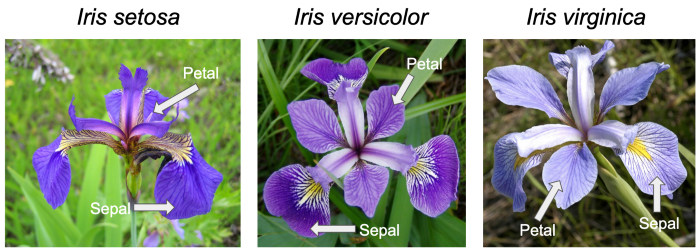
*Petals & Sepals for Iris setosa, Iris versicolor, and Iris virginica (Sources: 1, 2, 3, Licenses: Public Domain, CC BY-SA 3.0 & CC BY-SA 2.0)*

The iris data set was introduced by [Ronald Aylmer Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher "Ronald Fisher") who was well-known as a statistician and geneticist. He also invented the [Fisher’s exact test](https://en.wikipedia.org/wiki/Fisher%27s_exact_test) and the ANOVA analysis of variance. <br>
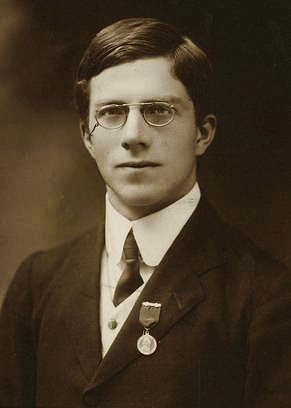
*Sir Ronald Aylmer Fisher (Source: Wikipedia, License: Public Domain)*

The iris data set was first published along with a publication by Fisher titled “The Use of Multiple Measurements in Taxonomic Problems” in the journal Annals of Eugenics in 1936. You can read the full text [here](https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1469-1809.1936.tb02137.x) if you are interested. The article covers a linear function to differentiate Iris species based on the morphology of their flowers. 
The entire data set in the publication looks like this:

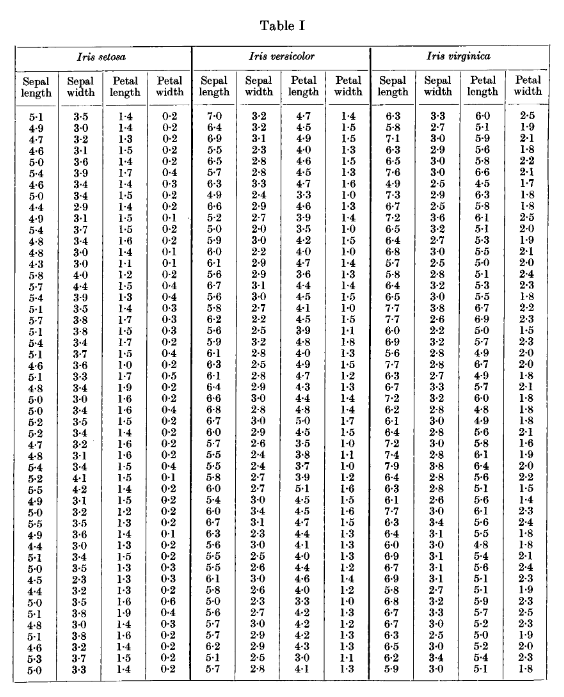
*Morphological Measures of Iris Flowersfrom "The Use of Multiple Measurements in Taxonomic Problems" Fisher (1936)

However, Fisher didn’t collect these data himself, he explicitly mentions the data source to Dr. Edgar Anderson, who collected the majority of the data in Canada.

## Let's use the iris data set to show you how Jupyter Notebooks work:

### import libraries 

In [2]:
# first we import the some libraries
import numpy as np
import pandas as pd
import sklearn
import scipy 
import seaborn as sns
import matplotlib.pyplot as plt
# Very important: Enable inline plotting from matplotlib to show the plots directly in the Notebook below the cells
%matplotlib inline

# we also import the sklearn libraries for later use
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
# We can input data from web sources or files on your computer

# define the url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# create a list with the column headers
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
# then read it as a pandas dataframe, instead uf using an url here, you can also define a path to a file on your device
iris = pd.read_csv(url, names=names)

### examine the data

In [5]:
# just print the head (the first few rows) of the data:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# describe a few statistical details of the data
print(iris.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
# count the number of samples per species
iris['species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

### visually inspect the data


<Figure size 2304x1152 with 0 Axes>

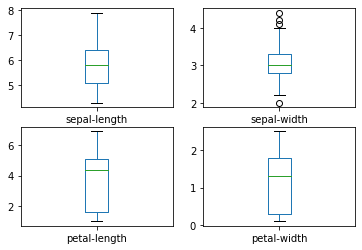

In [8]:
#  Create and show box and whisker plots
plt.figure(figsize=(8,4),dpi=288)
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

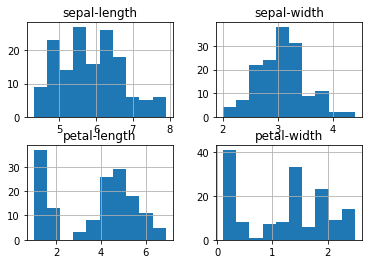

In [9]:
# Create and show histograms
iris.hist()
plt.show()

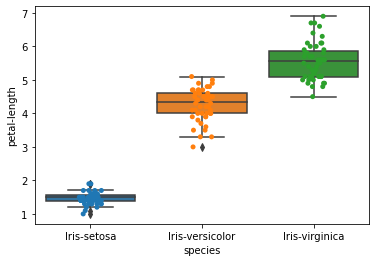

In [10]:
# colorful boxplots 
ax = sns.boxplot(x="species", y="petal-length", data=iris)
ax = sns.stripplot(x="species", y="petal-length", data=iris, jitter=True, edgecolor="gray")

C:\Users\flori\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


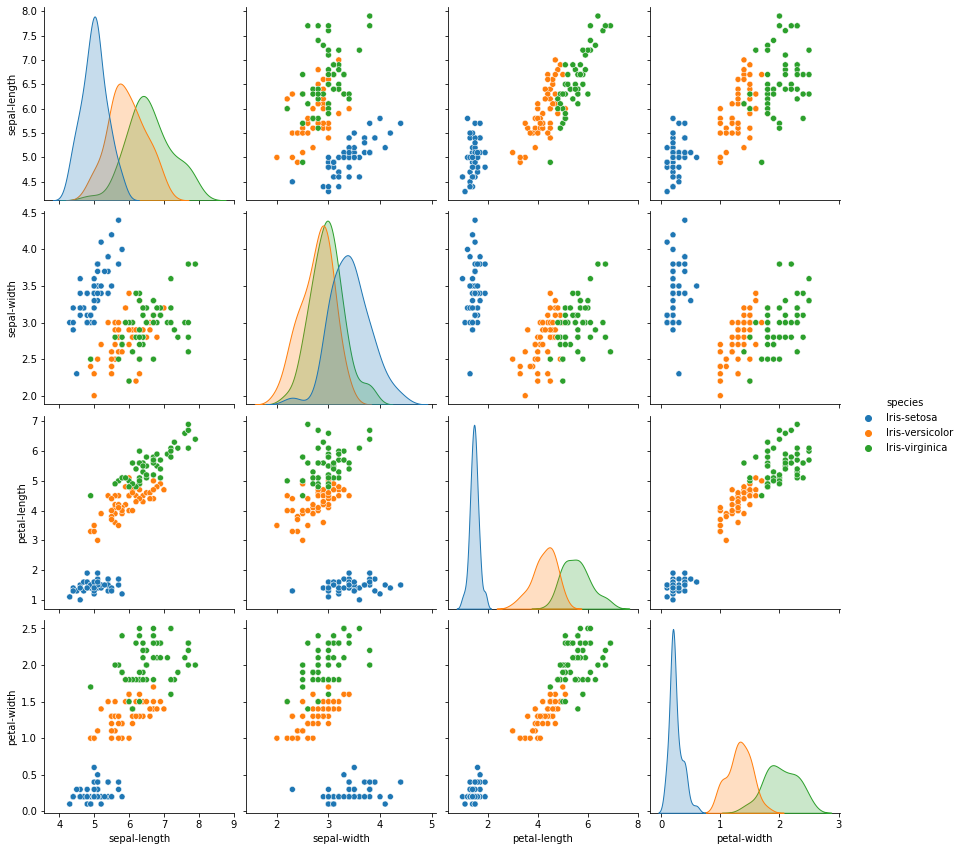

In [11]:
# create a pairplot
sns.pairplot(iris, hue="species", size=3)

### modelling with scikit-learn

In [10]:
X = iris.drop(['species'], axis=1)
y = iris['species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


#### Split the dataset into a training set and a testing set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


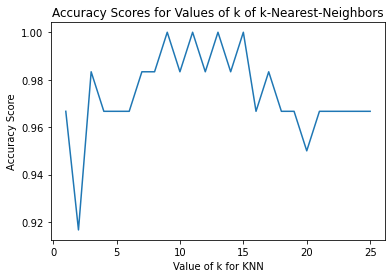

In [12]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [13]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


#### Choosing KNN to Model Iris Species Prediction with k = 12¶
After seeing that a value of k = 12 is a pretty good number of neighbors for this model, I used it to fit the model for the entire dataset instead of just the training set.

In [14]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[5, 3, 5, 2]])

array(['Iris-virginica'], dtype=object)

Sources:
* https://towardsdatascience.com/the-iris-dataset-a-little-bit-of-history-and-biology-fb4812f5a7b5
* https://en.wikipedia.org/wiki/Iris_flower_data_set
* https://blueowlpress.com/wp-content/uploads/IrisTutorialPart1.html
* https://www.kaggle.com/code/jchen2186/machine-learning-with-iris-dataset/notebook